In [1]:
import os
os.chdir('/home/gsalinas/GitHub/nbaaxionns/')

import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt
from numba import njit
import plotly.graph_objects as go

from classes import Particles, NeutronStar, AxionMiniclusterNFW
from scripts import (repeat, selectrvs, metropolis, rdistr, rm_far,
                    min_approach, energy, grav_en, add_ps, nums_vs, randdir2d,
                    mag, heav, step, proposal, mydot, cyldistr, EmptyClass, stepdistr)

/home/gsalinas/GitHub/nbaaxionns/scripts/basic.py:77: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  return heav(xbounds[1] - v, 1.) - heav(xbounds[0] - v, 0.)


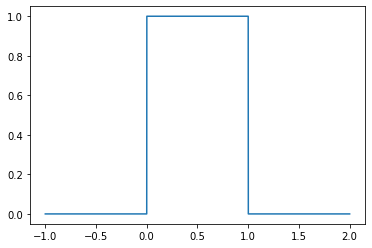

In [2]:
xs = np.linspace(-1, 2, 10_000)

plt.plot(xs, step(xs))

/home/gsalinas/GitHub/nbaaxionns/scripts/metropolis.py:29: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  trial = proposal(x, sigma=sigma) # random neighbor from the proposal distribution


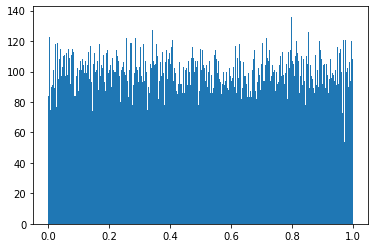

In [3]:
samples = np.array(list(metropolis(stepdistr, 100_000, x0=0.5, sigma=0.05, O=EmptyClass())))
plt.hist(samples, bins = np.linspace(0, 1, 1_000));

In [4]:
xs, ys = np.linspace(0.,1.,100), np.linspace(0.,1.,100)
mesh = np.array(np.meshgrid(xs, ys))
positions = mesh.T.reshape(-1, 2)

xsbounds, ysbounds = (0.25, 0.75), (0.25, 0.75)
zs = np.array([stepdistr(position, (0.25, 0.75), O=EmptyClass()) for position in positions])

marker_data = go.Scatter3d(
    x=positions.T[0], 
    y=positions.T[1], 
    z=zs, 
    marker=go.scatter3d.Marker(size=1), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.show()

In [5]:
samples = np.array(list(metropolis(stepdistr, 10_000, np.array([0.5, 0.5]), np.array([0.05, 0.05]), xsbounds, O=EmptyClass())))
zs = np.array([stepdistr(position, (0.25, 0.75), O=EmptyClass()) for position in samples])

marker_data = go.Scatter3d(
    x=samples.T[0], 
    y=samples.T[1], 
    z=zs, 
    marker=go.scatter3d.Marker(size=1), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.show()

In [6]:
positions = np.array(list(metropolis(stepdistr, 10_000, np.array([0.5, 0.5, 0.5]), np.array([0.05, 0.05, 0.05]), xsbounds, O=EmptyClass())))
zs = np.array([stepdistr(position, (0.25, 0.75), O=EmptyClass()) for position in positions])
marker_data = go.Scatter3d(
    x=positions.T[0], 
    y=positions.T[1], 
    z=positions.T[2], 
    marker=go.scatter3d.Marker(size=1), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.show()

In [7]:
positions = np.array(list(metropolis(cyldistr, 10_000, np.array([0.5, 0.5, 0.5]), np.array([0.1, 0.1, 0.1]), xbounds=((0.,0.75),(0.,1.)), O=EmptyClass())))
marker_data = go.Scatter3d(
    x=positions.T[0], 
    y=positions.T[1], 
    z=positions.T[2], 
    marker=go.scatter3d.Marker(size=1), 
    opacity=0.8, 
    mode='markers'
)
fig=go.Figure(data=marker_data)
fig.show()